In [11]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pandas as pd
import os
# 也可以直接在import区提前设置(会导致负号无法显示)：
import matplotlib as mpl
mpl.rc("font", family='Droid Sans Fallback', weight="bold")

名称: overnightsmart20_RC,CTR_RC,jumpCTR_RC                        
来源: 20240109-东吴证券-技术分析拥抱选股因子”系列（十五）：换手率切割刀CTR因子Cutlets of TurnoverRate，换手率的异质信念               
作者: RC 
构造方法:
1. 构建思路：使用其余因子对换手率因子进行切割
2. 成交量对动量因子的修正：日内切割：取股票过去 20 个交易日，使用日内换手率对日内收益率进行切割（5组），求均值，计算高换手因子
3. 成交量对动量因子的修正：隔夜切割：取股票过去 20 个交易日，使用昨日换手率对隔夜收益率进行切割，求均值，计算高换手因子
4. 换手率对异质信念的识别：日内收益率对日内换手率做切割，计算高收益因子
5. 换手率对异质信念的识别：次日隔夜收益率的辅助,利用次日隔夜收益率对日内换手率做切割，计算低收益因子
6. 换手率对异质信念的识别：次日隔夜换手率的辅助,利用次日隔夜换手率对日内换手率做切割，计算高换手因子
7. 次日隔夜聪明钱:OvernightSmart $_t=\frac{\frac{r_t-\min \left(r_1, r_2, \ldots, r_{20}\right)}{\max \left(r_1, r_2 \ldots, r_{20}\right)-\min \left(r_1, r_2, \ldots, r_{20}\right)}}{T_t}$,取过去 20 个交易日的“隔夜聪明钱”均值作为新因子 OvernightSmart20；            
8. 换手率切割刀 CTR 因子（Cutlets of Turnover Rate）:按照次日隔夜聪明钱对日内换手率切割，计算低隔夜聪明钱因子；做市值中性化                         
9. 殊途同归：抢跑 CTR 因子：按照次日隔夜聪明钱从低到高排序；取隔夜聪明钱最小的三天的换手率，加上本月最后一个交易日的日内换手率，取这四天的换手率平均值后市值中性化得到新因子，抢跑 CTR（JumpCTR）。             

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


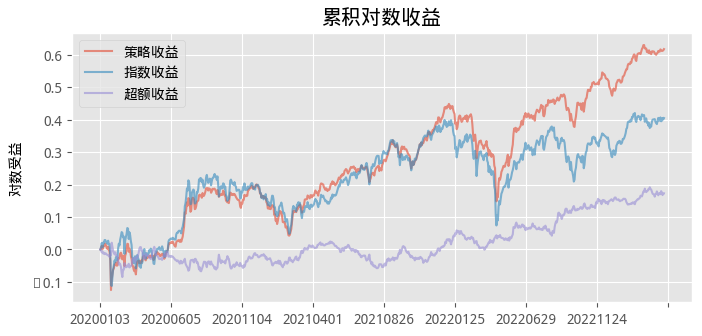

,指数收益,超额收益,策略收益
年化收益率,0.127,0.054,0.194
年化波动率,0.211,0.096,0.169
夏普率,0.605,0.570,1.152
最大回撤,-0.325,-0.106,-0.300
收益回撤比,0.392,0.515,0.647
胜率,0.540,0.501,0.542
盈亏比,0.945,1.095,1.039


In [12]:
factor = ff.read('overnightsmart20_RC')
p = ff.run((factor*ff.filter0).loc[:,:'20230416'], positions=100, period=1, fees=0)

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


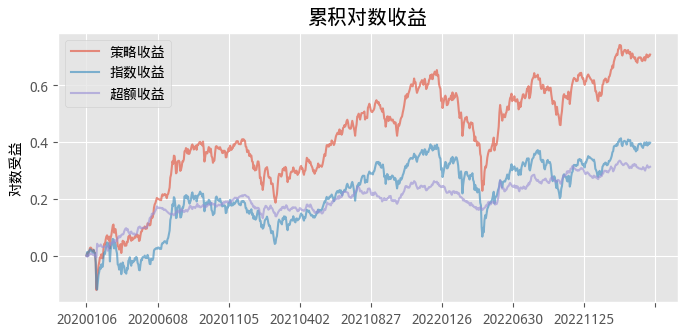

,指数收益,超额收益,策略收益
年化收益率,0.125,0.099,0.223
年化波动率,0.211,0.085,0.230
夏普率,0.595,1.161,0.970
最大回撤,-0.325,-0.102,-0.426
收益回撤比,0.385,0.969,0.525
胜率,0.539,0.504,0.559
盈亏比,0.946,1.200,0.928


In [15]:
factor = ff.read('CTR_RC')
p = ff.run((factor*ff.filter0).loc[:,:'20230416'], positions=100, period=1, fees=0)

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


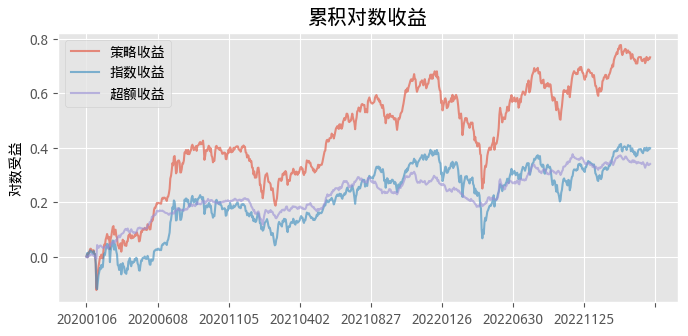

,指数收益,超额收益,策略收益
年化收益率,0.125,0.107,0.230
年化波动率,0.211,0.085,0.236
夏普率,0.595,1.258,0.978
最大回撤,-0.325,-0.129,-0.431
收益回撤比,0.385,0.831,0.535
胜率,0.539,0.509,0.554
盈亏比,0.946,1.201,0.949


In [16]:
factor = ff.read('jumpCTR_RC')
p = ff.run((factor*ff.filter0).loc[:,:'20230416'], positions=100, period=1, fees=0)